Group Names:

Sayemum Hassan

# Principal Components Analysis

Principal Components Analysis (PCA) is a widely used technique for dimensionality reduction.

## Learning Objectives

* Gain an understanding of PCA and how it relates to covariance matrices.


## Variance and Covariance Matrices

The cell below plots a small two-dimensional dataset.

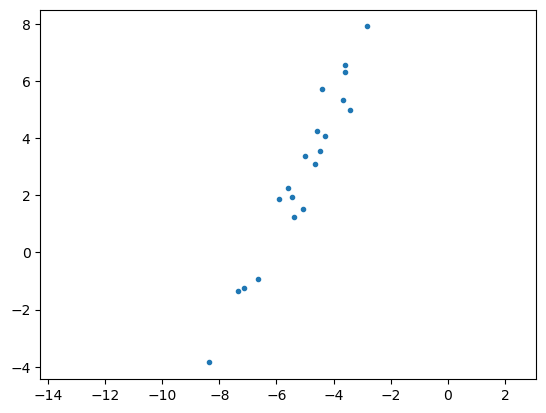

In [1]:
import matplotlib.pyplot as plt
import numpy as np

X = np.array([[-4.40394652,  5.7203612 ],
       [-5.4420319 ,  1.93587109],
       [-4.56570001,  4.2530108 ],
       [-5.07827013,  1.51210658],
       [-5.39695317,  1.25160109],
       [-4.28688083,  4.07841531],
       [-3.58299231,  6.30384398],
       [-5.60152663,  2.24470856],
       [-4.47414671,  3.54114625],
       [-5.00867538,  3.37502121],
       [-3.61698704,  6.57347194],
       [-7.14400941, -1.24682603],
       [-8.34978399, -3.85127918],
       [-7.35710211, -1.33622093],
       [-2.82445297,  7.90898657],
       [-4.65304533,  3.10063785],
       [-3.41097162,  4.96990604],
       [-5.91298693,  1.85557319],
       [-6.65790912, -0.91626863],
       [-3.67245142,  5.35009044]])


plt.plot(X[:, 0], X[:, 1], '.')
plt.axis('equal')
plt.show()


Run the cell above, then answer the following questions.

### Questions:
*   Approximately where is the mean of this data set?  In other words, what is $[\overline{x}_0, \overline{x}_1]^T$ (where the subscripts corrspond to features)?
*   If $\mathbf{S}$ is the sample covariance matrix of this data set, 
    $$\mathbf{S} = \begin{bmatrix} a & b \\ c & d \end{bmatrix}$$
    * Which entry in $\mathbf{S}$ corresponds to the variance of feature 0? 
    * Which entry in $\mathbf{S}$ corresponds to the variance of feature 1? 
    * What is the value of $a$ relative to $d$?  Larger?  Smaller? Equal?
    * What is the sign of $b$?
    * What is the value of $b$ relative to $c$?  Larger? Smaller? Equal?
*   If you could only keep one of the two features in this data set, which one would you pick.  Why?

Around (-5, 2).
a.
d.
A = x, D = y.
B is positive.
B = y, C = x.
Keep feature 0 since it has less variance.

## Centering the data

The first step in the PCA algorithm is to center the data by subtracting out the mean value of each feature:

The mean is:  [-5.07204118  2.83120787]


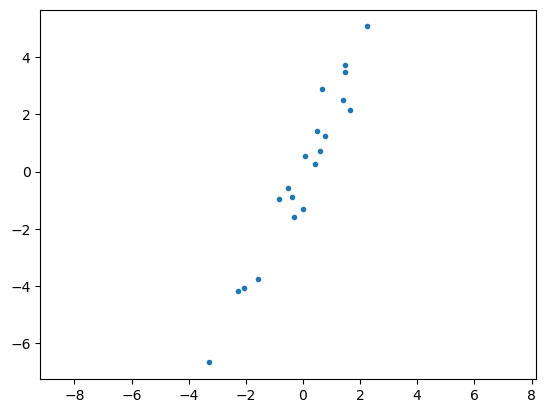

In [2]:
X_mean = np.mean(X, axis=0)
print("The mean is: ", X_mean)

X = X - X_mean # Center the data by subtracting out the mean.

plt.plot(X[:, 0], X[:, 1], '.')
plt.axis('equal')
plt.show()

## Finding the Sample Covariance Matrix

The next step is to calculate the sample covariance matrix.  The sample covariance matrix can be expressed as: 

$$\mathbf{S} = \frac{1}{n-1} \sum_1^n (X_i - \overline{X})(X_i - \overline{X})^T $$

Where $X_i$ represents the $i$th row of $X$ and $\overline{X}$ is the sample mean. 

Of course... In this case, we've already centered the data, so $\overline{X}$ is $\mathbf{0}$ and the formula reduces to:

$$\mathbf{S} = \frac{1}{n-1} \sum_1^n X_i X_i^T $$

This is equivalent to:

$$\mathbf{S} = \frac{1}{n-1} X^T X $$

Where $X$ is the full, centered, data matrix.  Lets see if it works!

Once you've executed the cell below, go back and check the answers you entered above.


In [3]:
n = X.shape[0] # grab the number of samples

S = X.T @ X / (n-1)

print("X.T times X:\n", S)

print("\nNumpy's version:\n", np.cov(X.T))

X.T times X:
 [[2.1033442  4.26897913]
 [4.26897913 9.18908776]]

Numpy's version:
 [[2.1033442  4.26897913]
 [4.26897913 9.18908776]]


## Eigenvectors

The *eigenvectors* of a matrix are special vectors that don't change direction when multiplied by that matrix. In other words, multiplying a matrix by one of its eigenvectors gives the same answer as multiplying by some scalar:

$$\mathbf{A} \mathbf{v} = \lambda \mathbf{v}$$

Here the scalar $\lambda$ is the known as an *eigenvalue*.

Consider the matrix $$\mathbf{A} = \begin{bmatrix} 1 & .5 \\ .5 & 1 \end{bmatrix}$$

Its eigenvectors are:

$$\mathbf{v}_1 = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix}, ~~
\mathbf{v}_2 = \begin{bmatrix} -\frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix}
$$ 

### Question

* Calculate by hand $\mathbf{A} \mathbf{v}_1$ and $\mathbf{A} \mathbf{v}_1$.  What are $\lambda_1$ and $\lambda_2$?


(Note that these two eigenvectors aren't unique.  We can rescale them, and the results will still be eigenvectors.  It is common to use eigenvectors that are scaled to unit length.)

YOUR ANSWER HERE

## Principal Components

It turns out that we can find the directions of maximum variance in a dataset by finding the eigenvectors of the covariance matrix.  The eigenvector with the largest eigenvalue points in the direction of maximum variance. **Before** executing the next cell, take a look back at the dataset above to predict the direction of the first principal component. 


In [ ]:

# Numpy is able to calculate eigenvalues and eigenvectors.
#   `lambdas` contains the eigenvalues (in sorted order)
#    The columms of `W` contain the corresponding eigenvectors.
lambdas, W = np.linalg.eigh(S)

# Lets reverse the order to get the largest first...

lambdas = lambdas[::-1]
W = W[:, ::-1]

print("Eigenvalues:", lambdas)
print("Eigenvectors:\n", W)

# Replot the data points
plt.plot(X[:, 0], X[:, 1], '.')
plt.axis('equal')

# Show the first principal component.
plt.arrow(0, 0, W[0,0] * 3, W[1,0] * 3, head_width=0.5, head_length=0.5)
plt.title('First Principal Component')
plt.show()

# Show the second principal component.
plt.figure()
plt.plot(X[:, 0], X[:, 1], '.')
plt.axis('equal')
plt.arrow(0, 0, W[0,1] * 3, W[1,1] * 3, head_width=0.5, head_length=0.5)
plt.title('Second Principal Component')
plt.show()

## Percentage Variance

The magnitude of the eigenvectors are exactly equal to the amount of variance along the corresponding eigenvector.  If we normalize the eigenvalues, they give us the fraction of the total variance explained by each principal component:

In [ ]:
print(lambdas / np.sum(lambdas))

In this case, around 99% of the variance is captured by the first principal component.

## Projecting Data Onto Principal Components

Once we have our principal components, we would like to know were each data point "lands" on each component.  In other words, we would like to project our data onto the principal components:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Dot_Product.svg/300px-Dot_Product.svg.png">

Here **A** corresponds to a data point and **B** corresponds to a principal component.  In the case where **B** is a unit vector, $|\mathbf{A}| \cos(\theta) = \mathbf{A} \cdot \mathbf{B}$.  In other words, the projection of **A** onto **B** is just the dot product between the two.  Using this information, we can project any one of our data points onto our first principal component. For example:


In [ ]:
# Plot all the original data and the first PC
plt.axis('equal')
plt.plot(X[:, 0], X[:, 1], '.', alpha=.2)
plt.arrow(0, 0, W[0,0]*5, W[1,0]*5, head_width=0.5, head_length=0.5)

# Pull out a single point and project it onto the first PC:
x0 = X[0,:]
x0_projected = x0 @ W[:, 0]
print("Projection: ", x0_projected)

# Plot the original point
plt.plot(x0[0], x0[1], 'og', label='Original Point')

# Plot where the original point is projected onto the PC:
plt.plot(W[0,0] * x0_projected, W[1,0] * x0_projected, 'or', label='Projected Point')
plt.legend()

plt.show()

print(x0_projected)

## Projecting ALL the data

We can get a rotated version of our original, centered, dataset by projecting every data point onto our two principal components.  This can be accomplished at one go by multiplying our data matrix by our matrix of principal components:

In [ ]:
X_new = X @ W
# Replot the data points
plt.plot(X_new[:, 0], X_new[:, 1], '.')
plt.axis('equal')
plt.show()

In this figure, the x-axis shows the projection of the data onto the first principal component, and the y-axis shows the projection of the data onto the second principal component.

### Questions:
You should be able to predict all of the values in the covariance matrix of this rotated version of the data without doing any additional calculations.  What are they?  If you aren't sure, take a guess and write some Python code to check your answer.

$$\mathbf{S} = \begin{bmatrix} a & b \\ c & d \end{bmatrix}$$
 * $a$: 
 * $b$: 
 * $c$: 
 * $d$: 
    

YOUR ANSWER HERE

## Reducing Dimensionality

In the example above, we multiplied our data matrix by a matrix containing *all* of the principal components.  We can reduce the dimensionality of the data by leaving out the principal components with smaller eigenvalues:


In [ ]:
Z = X @ W[:, 0] # Only the first column!

# Replot the data points
plt.plot(Z, np.zeros(Z.shape), '.')
plt.axis('equal')
plt.show()

## Moving Back to the Original Space

One way of viewing PCA is as a lossy compression algorithm: we compress the data by removing dimensions that don't carry much information.  We can then decompress by projecting our data back into the original space.  This can be done by multiplying our compressed data by the traspose of the vector of principal components that were used for compression:


In [ ]:
X_hat = np.outer(Z, W[:, 0].T) # need to use `outer `because stupid numpy 
                               # treats 1d arrays differently from column vectors
X_hat += X_mean # restore the mean

plt.plot(X_hat[:,0], X_hat[:,1], '.')
plt.axis('equal')
plt.show()

## Why Is All of This Useful?

In the example above, 99% of the variance is explained by the first principal component.  Now that the data is aligned with the principal components, we can discard the second feature, and in a sense, we are only losing 1% of the information from our original dataset. Discarding dimensions in this way can be helpful for a couple of different reasons:

### Visualization

Data that has four or more dimensions is essentially impossible to visualize using traditional techiques.  Using PCA we can reduce our high-dimensional data down to two or three dimensions for the purposes of visualization.  Depending on how much variance is explained by those first few dimensions, we may lose very little meaningful structure when moving to the low-dimensional space. 

### Dimensionality Reduction

Some machine learning algorithms will operate more efficiently, or give better results, when the dimensionality of the input data is low. PCA is a common pre-processing step for discarding "useless" dimensions before applying these algorithms.

## A Note on Implementation

In practice, we would *not* find the principal components by explicitly calculating the sample covariance matrix. Instead we would use *Singular Value Decomposition*.  Google it!


The the [next notebook](pca2.ipynb) we'll look at a larger scale example of PCA and discuss some limitations.